<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/M9T3_Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

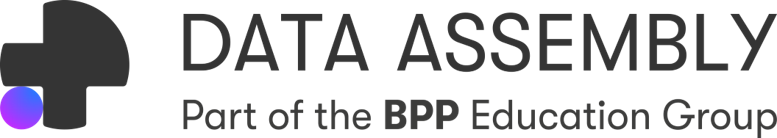

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further




<a name="contents"></a>
## Contents

<br>1. [Linear Regression](#section_1)
<br>2. [Multvariate Regression](#section_1)
<br>3. [Polynomial Regression](#section_2)
<br>4. [Logistic Regression](#section_3)
<br>5. [Regularisation](#section_4)


<h2><font color="#AA00BB">Welcome to our workbook on Predictive modelling!</font></h2>

This predictive modelling topic offers an in-depth exploration of predictive analytics, a key element of data science.


You will learn the importance of predictive modelling in data science and its role in business decision-making, covering classifiers, regression, supervised learning, and time series forecasting.


As the topic progresses, you will get a deeper understanding, covering topics like linear and logistic regressions, regularisation techniques, and hierarchical models, all geared towards practical application in your workplace.


Let's get started!

<a name="section_1"></a>

# **1. Linear Regression**


[Return to contents](#contents)

Linear Regression with California Housing Data - In this tutorial we will guide you through the process of using linear regression to predict median house values in Californian districts, based on median incomes.

Linear regression is a foundational statistical method that allows us to model and examine the relationship between two continuous variables. In this case, we are looking at the relationship between median income and median house value.

In this example, we'll use **one (a single)** feature, **'Median Income'(x-axis),** to predict the **'Median House Value (y-axis)'**.

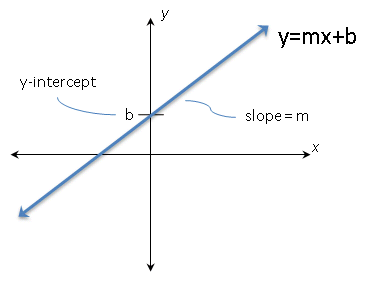

### **1.1 Exploring the California housing dataset**

The **California Housing dataset** is a popular dataset used in machine learning and statistics. It contains information about housing in various districts of California, with features including median house value, income, population, and more. It's often used for tasks such as regression analysis and predictive modeling to understand the factors influencing housing prices in different regions of California.

In [ ]:
import pandas as pd

# Load the California housing data
california_housing = fetch_california_housing()

# Create a DataFrame and set column names
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# First, we will import the necessary libraries.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

# Now, let's load the California Housing dataset. This dataset contains data on
# housing features and the median house values of California districts.
california_housing = fetch_california_housing()

# For our linear regression model, we will use only one feature, 'Median Income',
# to predict the 'Median House Value'. We extract the feature and the target variable.
X = california_housing.data[:, np.newaxis, 7]  # Median Income feature
y = california_housing.target  # Median house value

# Before building our model, we need to split our data into training and testing sets.
# This allows us to train our model on one set of data and then test it on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1.2 We can now create our linear regression model and fit it to our training data.**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Fitting the model means that we are letting it 'learn' from the data.

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-Squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.31
R^2 Score: 0.00


And that's it! You have now created, trained, and evaluated a simple linear regression model on the California housing dataset. The plot you see provides a visual representation of how your model's predictions compare to the actual values.

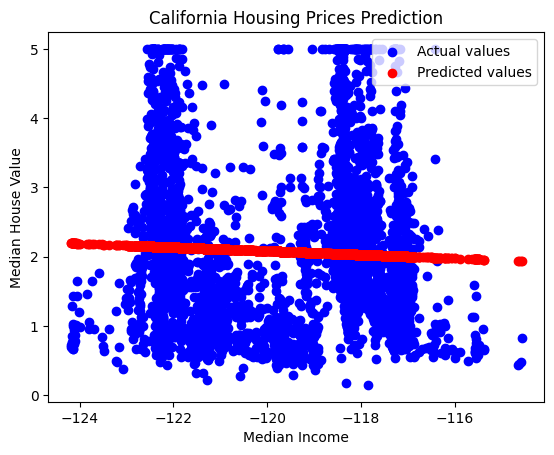

In [ ]:
# Once the model is fitted, we can make predictions on our test data.
predictions = model.predict(X_test)

# Let's visualise how well our model is doing. We will plot the actual values from the
# testing set against our predictions.
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('California Housing Prices Prediction')
plt.legend()
plt.show()

### **1.3 Analysis of the above plot**

As we can see, the plot above suggests that the linear regression model, which predicts median house values based on median income alone, **does not capture** the complexity of the data. The model outputs a **constant prediction across all levels of income**, which implies that it has **not identified** a significant relationship between the median income and house values within the dataset.

Using a single variable for prediction can lead to a weaker model because it assumes that the outcome is **dependent on just one factor**, which is rarely the case in real-world scenarios.

In the context of housing prices, many factors can influence the value of a house, such as its size, location, number of rooms, and local amenities, in addition to the median income of the area.

By relying on only one variable, we ignore other potential influences that could provide a more nuanced and accurate prediction. This can result in **underfitting**, where the model is too simplistic and fails to capture the underlying trends in the data.

**To address these limitations, we can extend our analysis to multivariate regression,** which involves multiple independent variables.

By utilising more information, a multivariate model can better understand the relationships and interactions between different variables, potentially leading to more accurate and reliable predictions.

##⌨️ **Exercise**

1. **Simple**: What feature did we use to predict the Median House Value?
2. **Simple**: Did we use one feature to predict the target variable?


---
<a name="section_2"></a>

# **2. Multivariate Regression**


[Return to contents](#contents)


#### **Introduction to Multivariate Regression**
Multivariate regression is used when you want to predict the value of a variable based on the values of two or more other variables. The model will look at the influence of each independent variable on the dependent variable while controlling for the effect of all other independent variables.

#### **Why Use Multivariate Regression?**

In real-world data, outcomes are often affected by multiple factors. For example, house prices are influenced by the location, size, number of rooms, and many other features, not just median income. Multivariate regression allows us to **include all these variables in our model**, giving us a more accurate and holistic view of what determines house prices.

### **2.1 Preparing the Data**
For a multivariate regression, you would load the dataset and select multiple features that you believe are relevant to predicting your target variable.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
california_housing = fetch_california_housing()

# Select features
X = california_housing.data  # All features in the dataset
y = california_housing.target  # Target variable, median house value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **2.2 Creating the Multivariate Regression Model**
Using sklearn, you can create a multivariate regression model in much the same way as a simple linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

LinearRegression()

### **2.3 Making Predictions and Evaluating the Model**
With a trained model, you can make predictions and evaluate the model's performance using the same metrics as in simple regression, but this time they will reflect the contribution of all the features used.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-Squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.56
R^2 Score: 0.58


####**Analysis of the results**

The multivariate regression model demonstrates a marked improvement over the single-variable model, with its **Mean Squared Error significantly reduced from 1.31 to 0.56**, indicating more precise predictions. Additionally, the R² score has increased from 0.00 to 0.58, suggesting that the **multivariate model explains 58% of the variance in the target variable**, whereas the single-variable model explained virtually none, highlighting the enhanced predictive power and accuracy when multiple variables are considered.

### **2.4 Visualising the Model**
Visualising a multivariate regression is more complex than a univariate one since you can't represent multiple dimensions easily on a 2D plot. However, you could visualise the relationship between the predicted values and the actual values to assess the model's performance.

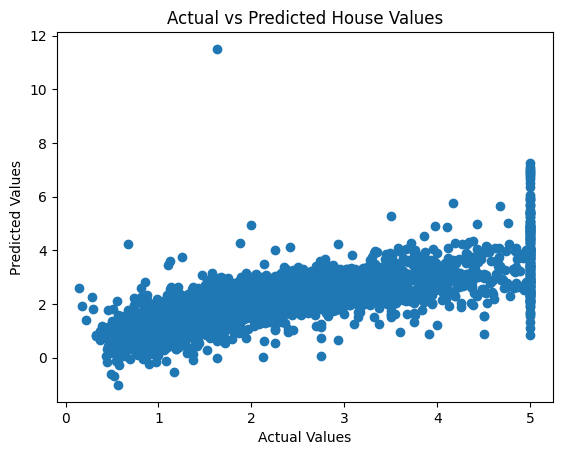

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()

The reason why predicted values are higher than the actual values could be due to the model attempting to predict values that should have been higher than the cap. Tte model detects some instances where the house value would naturally be higher but is restricted by the dataset's imposed limit.

##⌨️ **Exercise**

1. **Moderate**: Calculate and print the Mean Squared Error (MSE) for the multivariate regression model using all features these 3 features - MedInc	HouseAge	AveRooms? (Code required)
2. **Challenging (Optional🚀):** Did we use one feature to predict the target variable? (Code required)


---
<a name="section_3"></a>

# **3. Introduction to Polynomial Regression**


[Return to contents](#contents)


Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial. Polynomial regression can fit data with curves, unlike linear regression which is limited to lines.

### **3.1 Why Use Polynomial Regression?**
In cases where the data show a curvilinear relationship, a straight line through the data points might not best describe the trends. This is where polynomial regression comes in, allowing for a curved line to better fit the nonlinear patterns in the data.

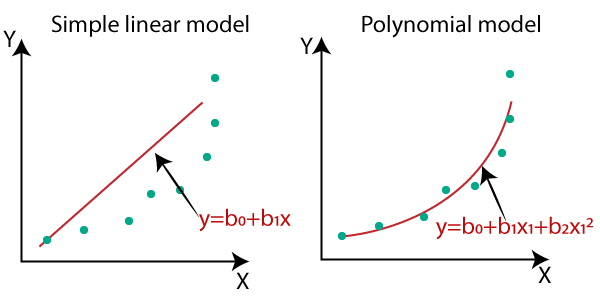

#### **Slow down, linear regression, multivariate and now polynomial?**

It can be a bit confusing at this point, so let's slow down and explain each.


- A **linear regression** is a statistical method that models the relationship between a dependent variable and one independent variable with a **straight line.**

- **Multivariate regression** extends this by considering **multiple independent variables** simultaneously to predict the dependent variable's outcome.

- **Polynomial regression**, on the other hand, allows for more complex relationships by fitting a **polynomial curve** to the data, accommodating **nonlinear patterns** in the data better than simple linear regression. A polynomial by be based on one dependent variable (univariate) or several (multivariate).

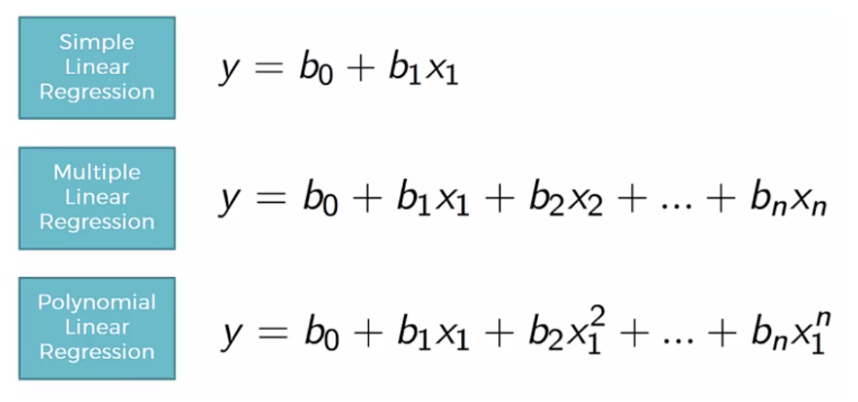

Some examples of non-linear relationships are:

- **Population Growth**: Initially rapid, then slows down as resources become scarce, forming an S-shaped curve.

- **Cooling of Hot Objects**: Objects cool faster when they're much hotter than their surroundings, and slower as they approach the surrounding temperature.

- **Vehicle Acceleration:** Acceleration is quick at first but slows down at higher speeds due to factors like air resistance.

- **Pendulum Motion:** A pendulum moves in a simple, linear way for small swings, but its motion becomes more complex and non-linear with larger swings.


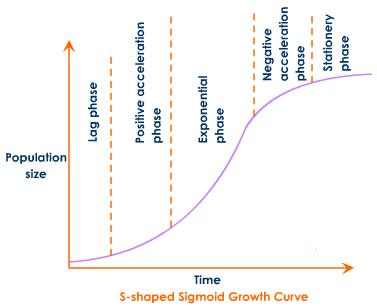







### **3.2 Extending the Linear Model to Polynomial**

The same dataset will be used, but this time, instead of fitting a linear model, a polynomial model will be applied.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are already defined and split

# Choose a degree for the polynomial features (e.g., 2 for quadratic)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# Make predictions on the test data
y_pred = polyreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.46
R^2 Score: 0.65


### **3.3 Analysis of our results**


The polynomial regression model has yielded a **lower Mean Squared Error** and a **higher R² score** compared to the multivariate linear regression.

Specifically, the MSE decreased from 0.56 to 0.46, indicating a better fit of the model to the data.

The R² score increased from 0.58 to 0.65, suggesting that the polynomial model explains 65% of the variance in the target variable, a 7% improvement over the multivariate model.

This suggests that the **polynomial regression has captured more complex relationships** between the variables and the target.

### **3.4 Visualising the Model**
Visualisation in polynomial regression is similar to linear regression, plotting the predicted values against the actual values.

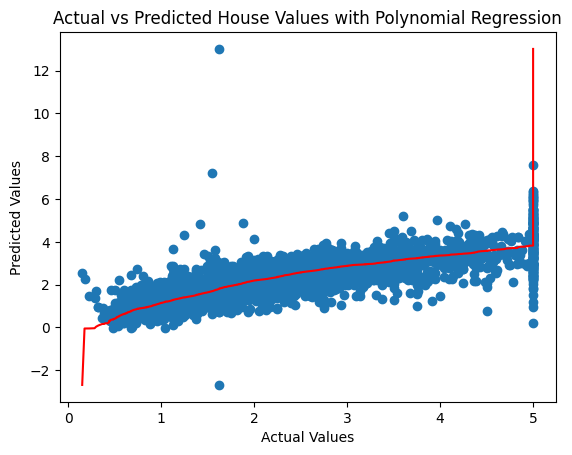

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot(np.sort(y_test), np.sort(y_pred), color='red')  # This creates the curve
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values with Polynomial Regression')
plt.show()

The plot shows a polynomial regression model's fit to the housing data. While the model generally matches the central trend, the sharp rise at the high end indicates overfitting, especially to capped values in the dataset. The negative predictions at the low end also suggest the model's limitations in extrapolating for lower-valued homes.

While polynomial regression can be powerful for modelling complex datasets, its interpretation can be less straightforward than linear regression. Care must be taken in selecting the right degree for the polynomial and in analysing the model's fit to avoid overfitting.

Learn more about Linear Regressions from the official Scikit-Learn documentation:

🔑 https://scikit-learn.org/stable/modules/linear_model.html

### **Here's an interactive Linear Regression Webapp**

Create scatterplots from scratch by clicking in an empty plot to add or remove points. Investigate the effect of outliers on the correlation coefficient or regression line. Simulate linear or non-linear relationships.  

🔑 https://istats.shinyapps.io/ExploreLinReg/

In [ ]:
from IPython.display import IFrame
url = "https://istats.shinyapps.io/ExploreLinReg/"
width = 1000
height = 550
IFrame(url, width=width, height=height)

##⌨️ **Exercise**

1. **Moderate**: Plot the actual versus predicted values using a scatter plot to visualise the fit of the polynomial regression model. (Code required)
2. **Moderate:** Experiment with different degrees of the polynomial (e.g., 3, 4) in the regression model and observe the change in MSE.(Code required)
2. **Challenging (Optional🚀):** Implement a loop to determine the polynomial degree that results in the lowest MSE for the given dataset.(Code required)


---
<a name="section_4"></a>

# **4. Logistic Regression**


[Return to contents](#contents)


Logistic regression is a statistical method for predicting binary outcomes. It's used when the dependent variable is categorical. The output of logistic regression is a probability that the given input point belongs to a certain class.

A common real-world dataset used for binary classification is the Titanic dataset. It contains information about passengers, and the task is to predict survival.

### **4.1 Loading and Explorign the Dataset**
First, we load the Titanic dataset using Seaborn's built-in function. We’ll also handle missing data by dropping rows with missing values for simplicity.

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
titanic = sns.load_dataset('titanic')

# Drop NA values for simplicity
titanic.dropna(inplace=True)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### **4.2 Preparing the Data**
Now we select our features and the target variable. The features chosen should be relevant for predicting the target. In this case, 'pclass', 'age', and 'fare' seem like they could influence a passenger's survival. We also need to split our data into a training set and a test set to evaluate our model later.

In [ ]:
# Selecting features and target
X = titanic[['pclass', 'age', 'fare']]  # Simple feature set
y = titanic['survived']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.3 Creating the Logistic Regression Model**

With our data prepared, we can define and fit our logistic regression model. Fitting the model involves 'training' it on the data: the model learns the relationship between features and the survival outcome.

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

### **4.4 Making Predictions and Evaluating the Model**
After fitting the model, we use it to make predictions on the test set. Then, we'll evaluate the model's performance using a confusion matrix, which tells us about the number of correct and incorrect predictions, and a classification report, which provides key metrics such as precision and recall.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the Test set results
y_pred = logreg.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print(classification_report(y_test, y_pred))

[[ 3 10]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.71      1.00      0.83        24

    accuracy                           0.73        37
   macro avg       0.85      0.62      0.60        37
weighted avg       0.81      0.73      0.67        37



### **4.5 Interpretation of Results**


The model has a 73% accuracy, performing well overall, especially in predicting the more common class. However, the performance across classes is uneven, as highlighted by:

- High precision but low recall for non-survivors (class 0), indicating many actual non-survivors were missed.
- High recall but lower precision for survivors (class 1), implying some false positives in this category.
- Better performance metrics for the prevalent class, as seen in the weighted average.

### ⌨️ **Exercise: Build a Non-Binary Classifier for the Iris Dataset**
The Iris dataset is a classic dataset in machine learning, containing 150 records of iris plants with four features: sepal length, sepal width, petal length, and petal width. It has three classes, each representing a type of iris plant: Setosa, Versicolour, and Virginica.

**Tasks**

Your task is to build a classifier that can predict the type of iris plant based on the four features mentioned above.

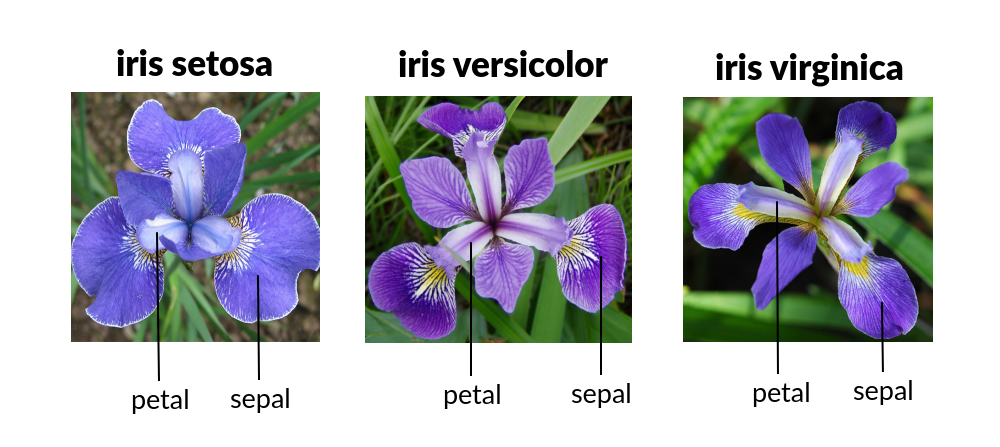

In [ ]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

#### **Task 1 - Split the Data**

Fill in the missing code to split the dataset into training and testing sets. Use a test size of 30% and a random state of 42 for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

# TODO: Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(____, ____, test_size=____, random_state=____)

#### **Task 2 - Train the Classifier**
Now, choose a classification algorithm (e.g., K-Nearest Neighbors) and train your model on the training data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the classifier
classifier = KNeighborsClassifier(n_neighbors=____)

# TODO: Fit the classifier on the training data
classifier.fit(____, ____)

#### **Task 3 - Make Predictions**
Use your trained classifier to make predictions on the test set.

In [ ]:
# TODO: Make predictions on the test data
y_pred = classifier.predict(____)

#### **Task 4 - Evaluate the Model**
Lastly, evaluate your model's performance using the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score

# TODO: Calculate the accuracy of your predictions
accuracy = accuracy_score(____, ____)
print(f'Accuracy: {accuracy:.2f}')